In [1]:
#Importation of all the neccessary packages needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
import re

In [2]:
# Twitter API credentials
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

In [3]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Setting your access token and secret
auth.set_access_token(access_token, access_secret)

# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [4]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The Twitter user who we want to get tweets from
name = "falzthebahdguy"
# Number of tweets to pull
tweetCount = 100

# Calling the user_timeline function with our parameters
results = api.user_timeline(id=name, count=tweetCount)

# foreach through all tweets pulled
i = 1
for tweet in results:
   # printing the text stored inside the tweet object
    print (str(i) + ') ' + tweet.text + '\n')
    i = i +1

1) What is most pleasing is what we have started. I am so proud to be part of such a pivotal moment. we are finally wide awake!

2) What hurts the most is the numerous lives we ‘ve lost. Woke up with such a heavy heart yesterday 😞

3) RT @adekunleGOLD: EVERYONE THAT HAS A HAND IN THIS SACRILEGE WILL NOT KNOW PEACE!

4) @IntlCrimCourt CRIMES AGAINST HUMANITY ARE BEING COMMITTED HERE IN NIGERIA !

5) God!!!!

6) I’m so broken mahn 💔

7) THIS IS BY NO MEANS THE END !

8) RT @RealSeunKuti: APC UNA EXIT CARD FOR 2023 DON READI JUST LIKE PDP IN 2015, D YOUTHS GO MOBILIZE AND CHASE BOTH APC &amp; PDP OUT OF GOVT COM…

9) Let them just continue to embarrass themselves!

10) Please Lagos, let’s stay home and be law abiding. They are desperate to have something on us but they will NEVER su… https://t.co/WkL82hcQbf

11) In the light of all the thuggery we’ve seen, and the curfew imposed in Lagos state, it is important that we all sta… https://t.co/eYsEFksQd8

12) RT @MI_Abaga: This generation is 

In [5]:
# creations of dataframe with a cloumn called tweet
df = pd.DataFrame([tweet.text for tweet in results], columns = ['Tweet'])
df.head()

,Tweet
0,What is most pleasing is what we have started....
1,What hurts the most is the numerous lives we ‘...
2,RT @adekunleGOLD: EVERYONE THAT HAS A HAND IN ...
3,@IntlCrimCourt CRIMES AGAINST HUMANITY ARE BEI...
4,God!!!!


In [6]:
#clean up text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+' , '', text) # removing @mentions
    text = re.sub(r'#', '', text) #removing #tag symbols
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # removing hyperlinks
    text = re.sub(r'[^0-9A-Za-z \t]', '', text)
    text = re.sub(r'\w+:\/\/\S+', '', text)
    return text

#cleaning the text
df['Tweet'] = df['Tweet'].apply(cleanTxt)

#Showing the cleaned text
df


,Tweet
0,What is most pleasing is what we have started ...
1,What hurts the most is the numerous lives we v...
2,EVERYONE THAT HAS A HAND IN THIS SACRILEGE WI...
3,CRIMES AGAINST HUMANITY ARE BEING COMMITTED H...
4,God
...,...
95,omo E be the kind standards wey dey set with...
96,WhatsUpABUJA w NP One Trouser Listen here...
97,sometimes everrasting rove dont lass forever ...
98,Falz One Trouser Official Music Video onetro...


In [7]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create two new columns
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

#show the new dataframe with the new columns
df

,Tweet,Subjectivity,Polarity
0,What is most pleasing is what we have started ...,0.640000,0.340
1,What hurts the most is the numerous lives we v...,0.500000,0.075
2,EVERYONE THAT HAS A HAND IN THIS SACRILEGE WI...,0.000000,0.000
3,CRIMES AGAINST HUMANITY ARE BEING COMMITTED H...,0.000000,0.000
4,God,0.000000,0.000
...,...,...,...
95,omo E be the kind standards wey dey set with...,0.900000,0.600
96,WhatsUpABUJA w NP One Trouser Listen here...,0.000000,0.000
97,sometimes everrasting rove dont lass forever ...,0.357143,0.000
98,Falz One Trouser Official Music Video onetro...,0.000000,0.000


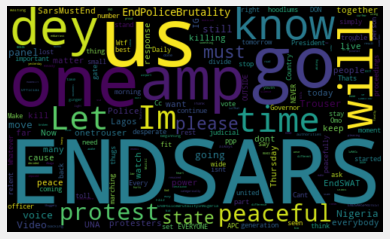

In [8]:
# Plot word cloud

allWords = ' '.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 500 , height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [9]:
# Create a function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
# Apply the getAnalysis function  
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show dataframe 
df

,Tweet,Subjectivity,Polarity,Analysis
0,What is most pleasing is what we have started ...,0.640000,0.340,Positive
1,What hurts the most is the numerous lives we v...,0.500000,0.075,Positive
2,EVERYONE THAT HAS A HAND IN THIS SACRILEGE WI...,0.000000,0.000,Neutral
3,CRIMES AGAINST HUMANITY ARE BEING COMMITTED H...,0.000000,0.000,Neutral
4,God,0.000000,0.000,Neutral
...,...,...,...,...
95,omo E be the kind standards wey dey set with...,0.900000,0.600,Positive
96,WhatsUpABUJA w NP One Trouser Listen here...,0.000000,0.000,Neutral
97,sometimes everrasting rove dont lass forever ...,0.357143,0.000,Neutral
98,Falz One Trouser Official Music Video onetro...,0.000000,0.000,Neutral


In [10]:
# Print all positive tweets
j = 1
sortedDF = df.sort_values(by='Polarity')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweet'][i])
        print()
        j=j+1

1) What is most pleasing is what we have started I am so proud to be part of such a pivotal moment we are finally wide awake

2) What hurts the most is the numerous lives we ve lost Woke up with such a heavy heart yesterday 

3) In the light of all the thuggery weve seen and the curfew imposed in Lagos state it is important that we all sta 

4) Our movement started peacefully and has remained peaceful The difference between our protesters and the hoodlums w 

5) The bio data part is optional Fair enough suggestion they are very organized indeed  

6)  That is why this panel is going to be aired live on Television No space for nonsenseSuffering and pain knows no Reli

7) They are not leaders o they are simply helping us monitor proceedings amp making sure we are carried along 

8) I would say for starters all proceedings must be broadcast live Make everybody dey watch as e dey go 

9) Many people dont know the significance of the state judicial panels being set up Took some time to shed

In [11]:
# Print all Negative tweets
j = 1
sortedDF = df.sort_values(by= ['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweet'][i])
        print()
        j=j+1

1) Im so broken mahn 

2) Please Lagos lets stay home and be law abiding They are desperate to have something on us but they will NEVER su 

3) Abaga This generation is different Omo you no fit scam us WE KNOW WHY WE ARE OUTSIDE WE KNOW WHAT WE WANT YOU NO FIT POIN

4) In a desperate bid to silence us amp stop the protests they have decided to result to using thugs LolThat one no 

5) Ehen Una don dey sorosoke small small Be calling names lets know 

6) I will not be on this panel I was given false information Plus there is no need for all this please The agenda 

7)  Cant protest but yall just had campaign rallies and conducted 2 elections recently  Do they think  Wtf Im ANGRY 

8)  For me  here is why Im marching tomorrow After the mess today I cannot accept that the folks still in detention and the fo

9)  Every Governor in the Country should ask their Commissioners of Police to tell all officers stand down Theyre the ones shooti

10) We are not out to cause trouble All we ask is th

In [12]:
#plot polatrity and Subjectivity

#plt.figure(figsize= (8,6))
#for i in range(0, df.shape[0]):
    #plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')
   # plt.title('Sentiment Analysis of @AishaYesufu Twitter handle')
   #plt.xlabel('Polarity')
   # plt.ylabel('Subjectivity')
   #plt.show()

In [13]:
#get percentage positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
round(ptweets.shape[0]/df.shape[0]*100, 1)

34.0

In [14]:
#get percentage Negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
round(ntweets.shape[0]/df.shape[0]*100, 1)

15.0

In [15]:
#get percentage Negative tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweet']
round(ntweets.shape[0]/df.shape[0]*100, 1)

51.0

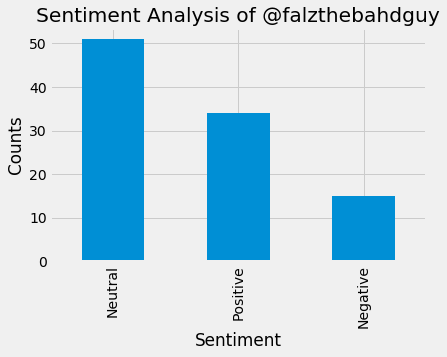

In [16]:
# show value count
df['Analysis'].value_counts

#plot the visual conts
plt.title('Sentiment Analysis of @falzthebahdguy')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar') 
plt.show()